# Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow THIRD EDITION Exercises

---

_**Nathan Jones - 05/2023**_

_**My answers to the chapter exercises from this [textbook](https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/)**_

---

## Table of Contents
[Chapter 1](#Chapter-1)
* [Reading Notes](#Chapter-1-rn)
* [Exercises](#Chapter-1-ex)

[Chapter 2](#Chapter-2)
* [Reading Notes](#Chapter-2-rn)
* [Exercises](#Chapter-2-ex)

[Chapter 3](#Chapter-3)
* [Reading Notes](#Chapter-3-rn)
* [Exercises](#Chapter-3-ex)

[Chapter 4](#Chapter-4)
* [Reading Notes](#Chapter-4-rn)
* [Exercises](#Chapter-4-ex)

[Chapter 5](#Chapter-5)
* [Reading Notes](#Chapter-5-rn)
* [Exercises](#Chapter-5-ex)

[Chapter 6](#Chapter-6)
* [Reading Notes](#Chapter-6-rn)
* [Exercises](#Chapter-6-ex)

[Chapter 7](#Chapter-7)
* [Reading Notes](#Chapter-7-rn)
* [Exercises](#Chapter-7-ex)

[Chapter 8](#Chapter-8)
* [Reading Notes](#Chapter-8-rn)
* [Exercises](#Chapter-8-ex)

[Chapter 9](#Chapter-9)
* [Reading Notes](#Chapter-9-rn)
* [Exercises](#Chapter-9-ex)

[Chapter 10](#Chapter-10)
* [Reading Notes](#Chapter-10-rn)
* [Exercises](#Chapter-10-ex)

---


<a id='Chapter-1'></a>
## Chapter 1

---

<a id='Chapter-1-rn'></a>
### Reading Notes:

**Question 1:** Why do you perform hyperparameter tuning on the training set only?

**Answer:** If you tune the model to score well on the test set then you are adapting the model and it's hyperparameters to produce the best model for that *particular set of data* (the test set)

**Question 2:** What is **holdout validation** and the **validation (dev) set**?

**Answer:** Holdout validation is when you take a chunk of the training set out and then evaluate several candiate models to select the best one. The chunk you took out is called the **validation** or **dev set**. You would train all of your candidate models on the training set minus the dev set, and then select the model that performed the best on the dev set. Once you have selected a model, you retrain the model on the entire training set (including the dev set you took out), and this becomes your final model. The last step is evaluating the final model on the test set to get an estimate of the generalization error. A more common approach if the data is small enough is to use k-fold CV.

<a id='Chapter-1-ex'></a>
### Exercises

1. Machine Learning is the use of computers and algorithms to gain insights from data without hardcoding rules and using rule base systems.

1. Machine Learning is good for problems without an algorithmic solution, replaces tedious manual work, adapt to changes quicker, and help humans learn.

1. A labeled training set is one where the target variable has known labels.

1. Regression, Classification

1. Clustering, Association, Dimensionality Reduction, Anomaly Detection

1. Reinforcement Learning

1. Clustering

1. Supervised

1. An online learning system is retrained "on the fly", or as new data comes in. It lets you update model parameters and is less computationally expensive than batch learning since you don't retrain the entire model over again, but instead train incrementally.

1. Out of core learning is when you have huge datasets that cannot fit in one machine's main memory. An out of core algorithm chunks the data into mini-batches and uses online learning to learn from the mini-batches

1. Instance Based

1. A model parameter is learned from training on the data (internal). A model hyperparameter is set by the engineer (external) usually through trial and error.

1. Model-based algorithms search for patterns in the data to either minimize a cost function or maximize a utility function. They make predictions by using the mathematical model which minimized the cost function and apply it to new data.

1. Data Quality, Bias, Data Mismatch, Lack of Informative Features

1. Overfitting. You can try a simpler model, regularization, or get more data

1. A test set is a set of data intentionally held out of the modeling process that you can use to estimate generalization error.

1. A validation set is used to find hyperparameter values and evaluate candidate models so you can select the model that performed the best before the final test on the test set.

1. The train-dev set is another partition of the training set you can use to avoid data mismatch (If you think your training data is not similar or representative of the validation / test sets) The train-dev set is not used to train the model, and then the model is evaluated on both the train-dev set and the validation set. If the model performs well on the training set but not on the train-dev set, then you are probably overfitting the train set. If the model performs well on both the train set and the train-dev set, but not the validation set, then you probably have a data mismatch problem and you should improve the training data.

1. You are tuning the model's hyperparamters to that particular test set which can make performance on future unseen data worse. Essentially you might be overfitting the test set. You should use a validation set to find the hyperparameter values.

#### Questions to Revist
5, 10, 11, 12, 14, 18

<a id='Chapter-2'></a>
## Chapter 2

---

<a id='Chapter-2-rn'></a>
### Reading Notes:

**Question 1:** When should you split your data into training and test sets? How is this related to *data snooping* bias?

**Answer:** You should inspect the dataset and look for glaring quality issues, or cast to appropriate data types. 

*Think: `df.head()`, `df.describe()`, `df[col_name].value_counts()`, `df.info()`, `df.hist()`*. 

Don't go much farther than univariate histograms for numeric variables, and value counts for categorical variables. By splitting the data into training and test sets before extensive EDA, you can avoid any potential knowledge from the test data influencing your modeling process. You don't want to consciously or subconsciously overfit your test data as that will give you a more optimistic and less accurate generalization error.

**Question 2:** Why do you need to hash a persistent unique identifier (never changes, new data appended to end, and no row deleted) when splitting your data into training and test sets?

**Answer:** If you didn't use a unique id to determine whether an observation belongs to the training or test set, you / the algorithms would eventually see the entire dataset. The splits are different each time, so you need a way to ensure that you have a stable train/test split after updating the dataset.

**Question 3:** What is stratified sampling? How would you take a stratified sample on a numeric attribute?

**Answer:** Stratified sampling is when you take sample a dataset and ensure that equal proportions of a specific group (*called a strata*) are represented in the sample as are represented in the overall population. For example, if you have biological sex as a predictor with 48% female and 52% male (*assuming this is the overall population proportions*), you can use stratified sampling to ensure you training set and test set have 48% females just like the overall population. To take a stratified sample on a numeric attribute, you can bin the numeric variable (`pd.cut()` or similar) and then perform the sampling as if it were a categorical variable.


**Question 4:** What are the 2 most common ways to scale predictor features? How do they differ?

**Answer:** Normalization (`MinMaxScaler()`) and Standardization (`StandardScaler()`). Normalization takes each value, subtracts the minimum value and divides by the difference between the minimum and maximum value. This rescales all of the values to be in the range $[0, 1]$. Standardization takes each value, subtracts the mean value and divides by the standard deviation. This rescales the data to have mean 0 and a standard deviation of 1.

**In math notation:** given $X$ is a given feature vector, $x_{i}$ is a single observationin $X$, $\bar{X}$ is the sample mean, and $\sigma_{X}$ the sample standard deviation

Normalization = $\frac{x_{i} - Min[X]}{Max[X] - Min[X]}$, for all $x_{i}$ in $X$

Standardization = $\frac{x_{i} - \bar{X}}{\sigma_{X}}$, for all $x_{i}$ in $X$

**Question 5:** What preprocessing technique should be done before scaling if a feature has a heavy tail (when values far from mean are not exponentially rare)?

**Answer:** You should transform the feature before scaling to shrink the heavy tail and make the distribution more symmetrical. Common transformation are square root and logarithms.

Features that are strictly positive and have a heavy right tail generally benefit from square root or raising to a power between 0 and 1. Features with a very long and heavy tail (such as a power law distribution) generally benefit from replacing the feature with its logarithm.

In simpler words, if the feature's values spread out to the right, but not too rapidly, use the square root transformation. If the values spread out significantly and decrease very quickly as they get larger, then the log transformation can be more appropriate.

**Question 6:** Your friend has just trained 2 models - Model 1 without hyperparameter tuning, and Model 2 with hyperparameter tuning. He claims that Model 1 had a lower cross validation `mean_test_score` than Model 2, but Model 2 had a better score on the test data so he decided to proceed with the tuned model. 

What was wrong about his approach and what advice would you give him to fix his error?

**Answer:** You **should never** interact with test set when experimenting with models, and only save it for the very end for the last scoring of your model. You should tell him that he should try some different hyperparameter search spaces (maybe there are better hyperparameter choices than the one he used), or to proceed with the untuned model since it had a better cross validation score.

In [142]:
# Download the housing data
from pathlib import Path 
import pandas as pd 
import tarfile
import urllib.request
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz") 
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz" 
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))
housing = load_housing_data()

In [143]:
# Preview the data
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [144]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [145]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [146]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

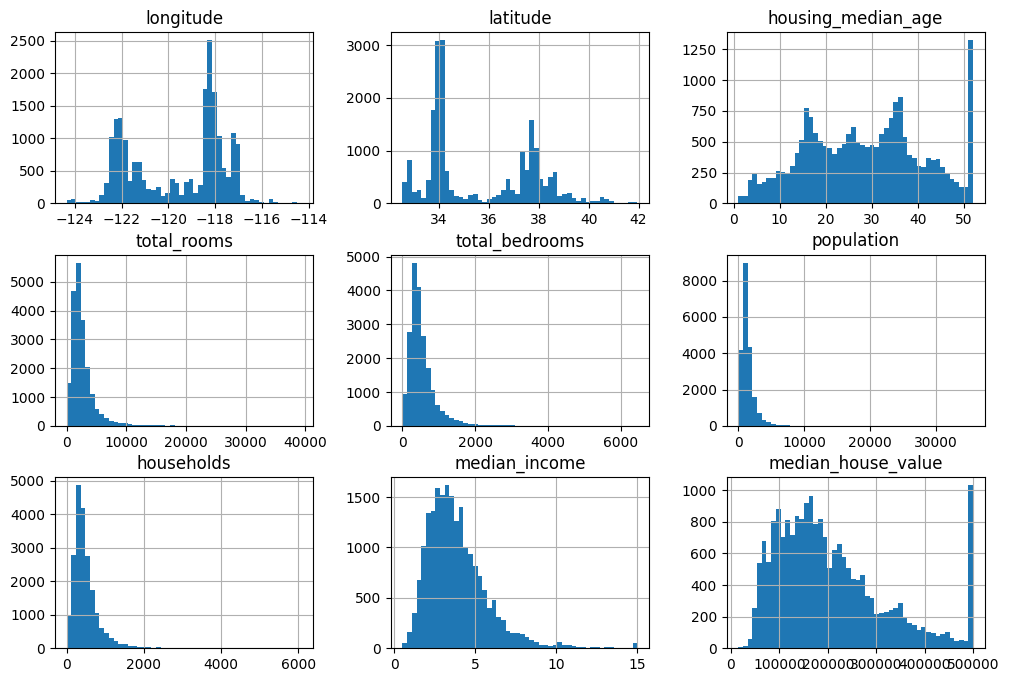

In [147]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12,8))

In [148]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

# Stratified split based on income category
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing["income_cat"])

# Drop the income_cat attribute
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Make a copy of the training set to perform EDA
housing = strat_train_set.copy()

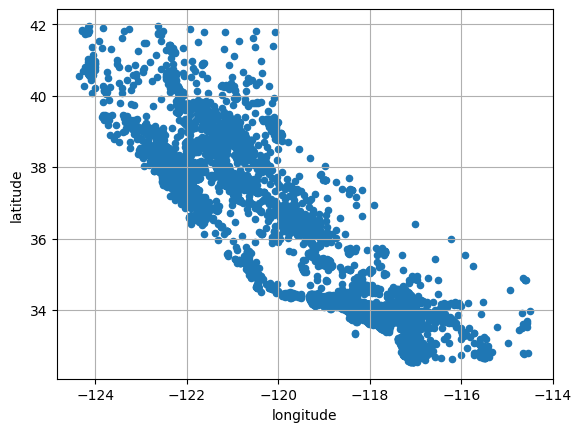

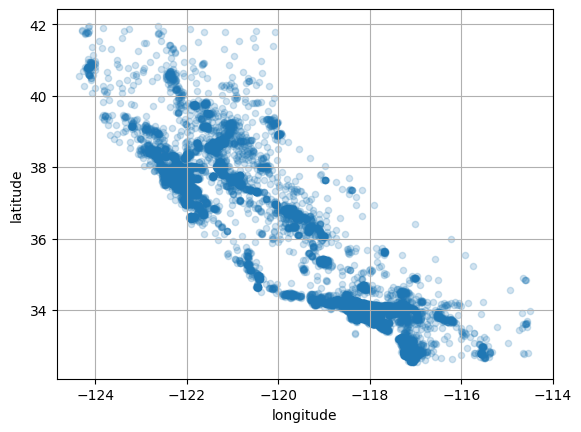

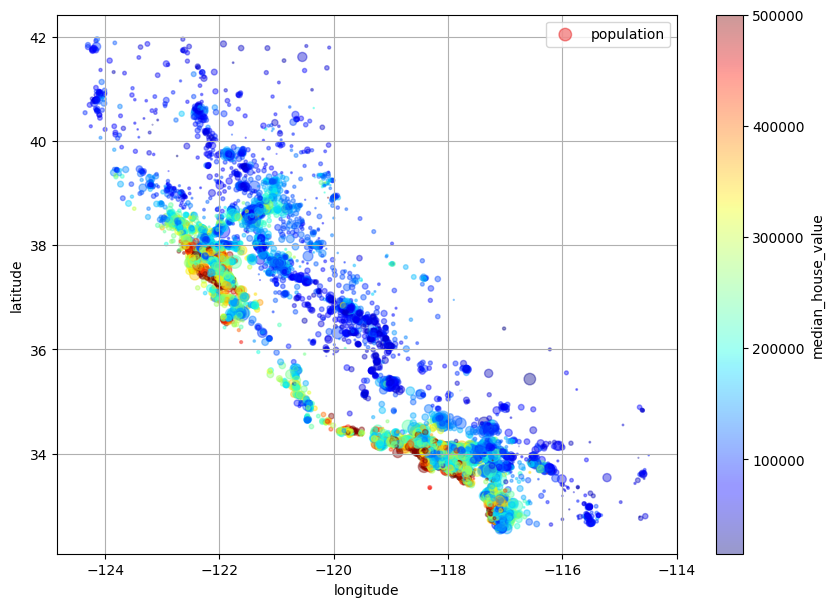

In [149]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

# Make it easier to visualize areas with high density of data points
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.4, s=housing["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap="jet", colorbar=True, sharex=False)
plt.show()

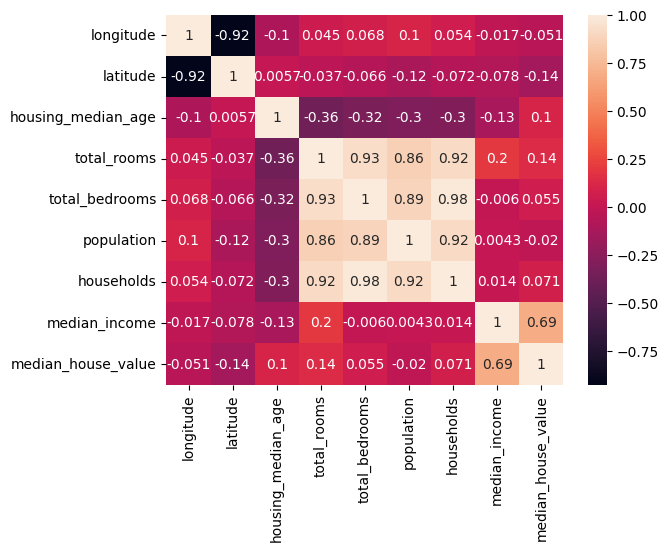

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

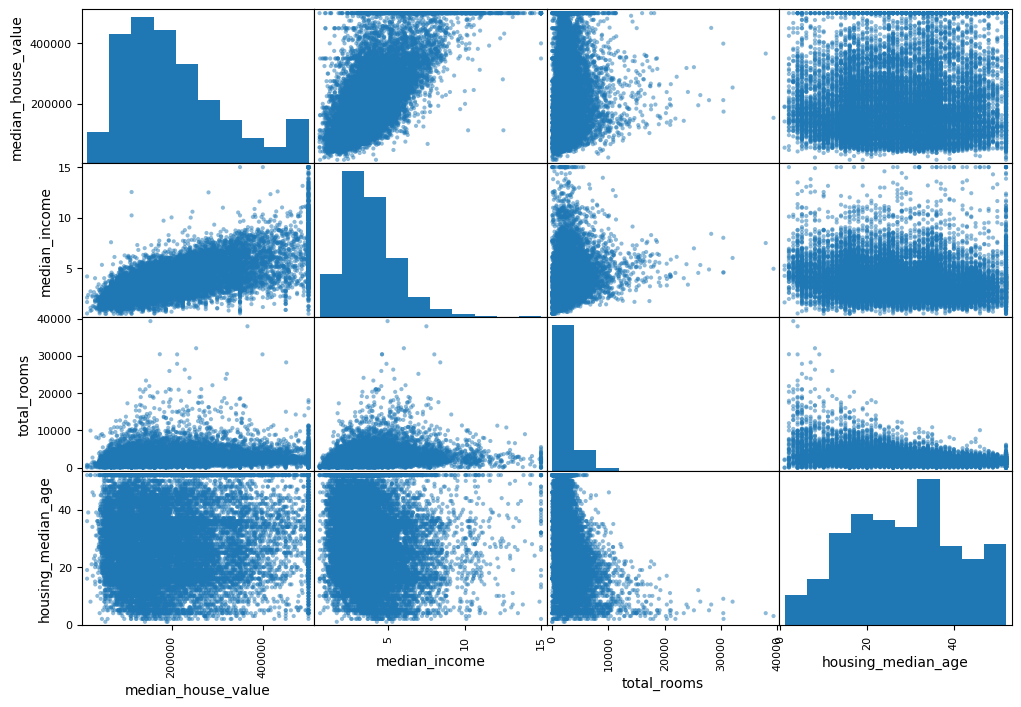

In [150]:
corr_matrix = housing.select_dtypes("number").corr()

import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

display(corr_matrix["median_house_value"].sort_values(ascending=False))

# Scatter matrix
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

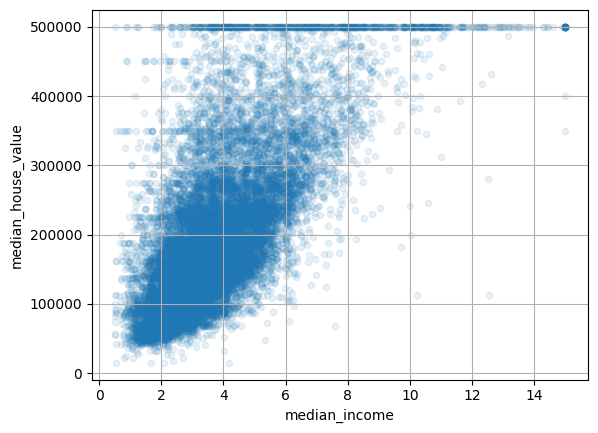

In [151]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)

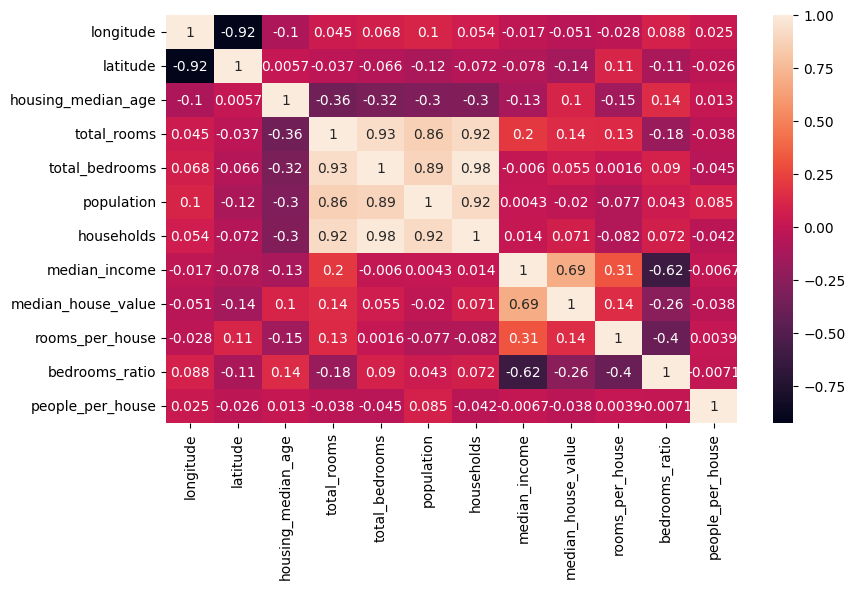

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

In [152]:
housing["rooms_per_house"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["people_per_house"] = housing["population"]/housing["households"]

corr_matrix = housing.select_dtypes("number").corr()

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr_matrix, ax=ax, annot=True)
plt.tight_layout()
plt.show()

display(corr_matrix["median_house_value"].sort_values(ascending=False))

In [153]:
# Prepare the data for ML algorithms
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
# Create features we explored earlier
housing["rooms_per_house"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["people_per_house"] = housing["population"]/housing["households"]

# Impute missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
# Only the numerical attributes since the median can only be computed on numerical attributes
housing_num = housing.select_dtypes("number")
imputer.fit(housing_num)
print(imputer.statistics_)
X = imputer.transform(housing_num)

# Convert the numpy array back to a dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

# One-hot encoding
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat = housing[["ocean_proximity"]]

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

# See the categories
print(cat_encoder.categories_)
# See the column names
print(cat_encoder.feature_names_in_)
# Get the feature names out
print(cat_encoder.get_feature_names_out())

[-1.18510000e+02  3.42600000e+01  2.90000000e+01  2.12500000e+03
  4.34000000e+02  1.16700000e+03  4.08000000e+02  3.53850000e+00
  5.23557310e+00  2.03105786e-01  2.82231619e+00]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]
['ocean_proximity']
['ocean_proximity_<1H OCEAN' 'ocean_proximity_INLAND'
 'ocean_proximity_ISLAND' 'ocean_proximity_NEAR BAY'
 'ocean_proximity_NEAR OCEAN']


In [154]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [155]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY,3.211799,0.335742,1.524178
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN,5.504202,0.180153,1.865546
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND,5.334975,0.200369,2.768473
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND,5.351282,0.203881,2.365385
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN,3.725256,0.277371,1.631399
...,...,...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN,4.277247,0.266875,1.793499
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND,5.535714,0.201019,2.667293
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN,5.157895,0.197704,3.702632
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN,4.511933,0.230891,2.058473


<a id='Chapter-2-ex'></a>
### Exercises

### 1)

In [180]:
# Training data has already been split into `housing`, and `housing_labels`

from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from scipy.stats import expon, loguniform

# Create a preprocessing pipeline ==> 1 for numeric, 1 for categorical
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder())
])

numeric_columns = housing.select_dtypes(include="number").columns
categorical_columns = housing.select_dtypes(exclude="number").columns

preprocessing_pipeline = ColumnTransformer([
    ("numeric_preprocessor", numeric_pipeline, numeric_columns),
    ("categorical_preprocessor", categorical_pipeline, categorical_columns)
])

# Create the final pipeline that combines an estimator with the preprocessing pipeline from above
pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("regressor", SVR())
])

# Use RandomSearchCV to find hyperparameter values and estimate generalization error.
param_grid = [
    {"regressor__kernel": ["linear"], "regressor__C": [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0, 10000.0, 30000.0]},
    {"regressor__kernel": ["rbf"], "regressor__C": [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0, 10000.0, 30000.0], "regressor__gamma": [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}
]
cv = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, refit=True, scoring="neg_root_mean_squared_error")
cv.fit(housing, housing_labels)

# Get the results from RandomizedSearchCV
cv_results = pd.DataFrame(cv.cv_results_)
#### Change from negative to positive RMSE
score_columns = [x for x in cv_results.columns if ("test_score" in x or "train_score" in x)]
score_columns = [x for x in score_columns if "rank" not in x]
score_columns = [x for x in score_columns if "std" not in x]
cv_results[score_columns] = cv_results[score_columns] * -1
print(f"CV Results")
display(cv_results.sort_values(by="mean_test_score").head(5))
print(f"Best Hyperparameters\n{cv.best_params_}")


CV Results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__C,param_regressor__kernel,param_regressor__gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
55,2.406196,0.038009,2.160939,0.103986,30000.0,rbf,3.0,"{'regressor__C': 30000.0, 'regressor__gamma': ...",61504.717703,61524.220943,61661.685928,61563.541525,69.853833,1
54,2.413715,0.025310,2.094212,0.006726,30000.0,rbf,1.0,"{'regressor__C': 30000.0, 'regressor__gamma': ...",64532.901574,64413.862241,64711.037712,64552.600509,122.118388,2
49,2.373377,0.010680,2.109492,0.003033,10000.0,rbf,3.0,"{'regressor__C': 10000.0, 'regressor__gamma': ...",64991.176037,64581.781284,64811.797033,64794.918118,167.560316,3
48,2.419782,0.045949,2.110282,0.003892,10000.0,rbf,1.0,"{'regressor__C': 10000.0, 'regressor__gamma': ...",67830.388330,67653.031044,67945.488653,67809.636009,120.293689,4
53,2.414627,0.008738,2.111311,0.024282,30000.0,rbf,0.3,"{'regressor__C': 30000.0, 'regressor__gamma': ...",67787.132485,67808.181404,68013.629544,67869.647811,102.172465,5


Best Hyperparameters
{'regressor__C': 30000.0, 'regressor__gamma': 3.0, 'regressor__kernel': 'rbf'}


In [181]:
# If you stopped here and wanted to use the test set ==>
### Use the exact same pipeline but replace SVR's hyperparameters with the hyperparameters you found from the results of RandomSearchCV
production_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("regressor", SVR(C=cv.best_params_["regressor__C"], gamma=cv.best_params_["regressor__gamma"], kernel=cv.best_params_["regressor__kernel"]))
])

# Add the features we engineered
strat_train_set["rooms_per_house"] = strat_train_set["total_rooms"]/strat_train_set["households"]
strat_train_set["bedrooms_ratio"] = strat_train_set["total_bedrooms"]/strat_train_set["total_rooms"]
strat_train_set["people_per_house"] = strat_train_set["population"]/strat_train_set["households"]

strat_test_set["rooms_per_house"] = strat_test_set["total_rooms"]/strat_test_set["households"]
strat_test_set["bedrooms_ratio"] = strat_test_set["total_bedrooms"]/strat_test_set["total_rooms"]
strat_test_set["people_per_house"] = strat_test_set["population"]/strat_test_set["households"]

# Refit on the entire training set
X_train = strat_train_set.drop(columns=["median_house_value"])
y_train = strat_train_set["median_house_value"].copy()

X_test = strat_test_set.drop(columns=["median_house_value"])
y_test = strat_test_set["median_house_value"].copy()

from sklearn.metrics import mean_squared_error

production_pipeline.fit(X_train, y_train)
y_pred = production_pipeline.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

60708.37696434178

### 2)

In [173]:
from sklearn.model_selection import RandomizedSearchCV

# Create a preprocessing pipeline
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

categorcial_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder())
])

numeric_columns = housing.select_dtypes(include="number").columns
categorcial_columns = housing.select_dtypes(exclude="number").columns

preprocessing_pipeline = ColumnTransformer([
    ("numeric_preprocessing", numeric_pipeline, numeric_columns),
    ("categorical_preprocessing", categorical_pipeline, categorcial_columns)
])

# Create a final pipeline with an Estimator at the end
pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("regressor", SVR())
])

# Set up hyperparamter search space
param_distributions = {
    "regressor__kernel": ["linear", "poly", "rbf"],
    "regressor__C": loguniform(20, 200000),
    "regressor__gamma": expon(scale=1)
}

# Use cross validation to find the optimal hyperparameters
cv = RandomizedSearchCV(estimator=pipeline, param_distributions=param_distributions, cv=3, random_state=42, refit=True, scoring="neg_root_mean_squared_error")
cv.fit(housing, housing_labels)

cv_results = pd.DataFrame(cv.cv_results_)

#### Change from negative to positive RMSE
score_columns = [x for x in cv_results.columns if ("test_score" in x or "train_score" in x)]
score_columns = [x for x in score_columns if "rank" not in x]
score_columns = [x for x in score_columns if "std" not in x]
cv_results[score_columns] = cv_results[score_columns] * -1
print(f"CV Results")
display(cv_results.sort_values(by="mean_test_score").head(5))
print(f"Best Hyperparameters\n{cv.best_params_}")

CV Results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__C,param_regressor__gamma,param_regressor__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,2.345367,0.031509,0.574064,0.000299,26290.206464,0.908447,poly,"{'regressor__C': 26290.206464300216, 'regresso...",63192.339997,63893.354498,63812.414097,63632.702864,313.131951,1
3,2.155784,0.012079,0.573185,0.000504,5075.631017,1.23125,poly,"{'regressor__C': 5075.631016531325, 'regressor...",65051.549238,65649.024594,65254.276809,65318.283547,248.081770,2
6,1.918021,0.022600,0.535958,0.003553,5901.413342,0.945856,linear,"{'regressor__C': 5901.413341581061, 'regressor...",72196.173880,71454.585378,71914.592391,71855.117216,305.659232,3
9,2.409658,0.013261,2.090751,0.036477,1334.473434,1.537936,rbf,"{'regressor__C': 1334.4734340928408, 'regresso...",80735.317623,80154.225805,80439.292393,80442.945274,237.243803,4
7,2.447352,0.027606,2.141801,0.018697,1068.587452,0.344223,rbf,"{'regressor__C': 1068.5874522559543, 'regresso...",86192.313610,84986.385094,85813.550448,85664.083051,503.535019,5


Best Hyperparameters
{'regressor__C': 26290.206464300216, 'regressor__gamma': 0.9084469696321253, 'regressor__kernel': 'poly'}


### 3)

In [192]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# Set up preprocessing pipeline ==> 1 for numeric, 1 for categorical

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

categorcial_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder())
])

# Define which columns are numeric vs. categorical
numeric_columns = housing.select_dtypes(include="number").columns
categorcial_columns = housing.select_dtypes(exclude="number").columns

# Combine into single preprocessing pipeline
preprocessing_pipeline = ColumnTransformer([
    ("numeric_processor", numeric_pipeline, numeric_columns),
    ("categorical_processor", categorical_pipeline, categorical_columns)
])

# Create a final pipeline with an Estimator at the end
pipeline = Pipeline([
    ("preprocssing", preprocessing_pipeline),
    ("feature_selection", SelectFromModel(RandomForestRegressor(random_state=42), threshold=.01)),
    # Use the previously found best parameters from RandomizedSearchCV
    ("regressor", SVR(C=cv.best_params_["regressor__C"], kernel=cv.best_params_["regressor__kernel"], gamma=cv.best_params_["regressor__gamma"]))
])

# Since we already tuned the model, let's get the cross validation score

rmses = -cross_val_score(estimator=pipeline, X=housing, y=housing_labels, cv=3, scoring="neg_root_mean_squared_error")
rmses = pd.Series(rmses)
print("RMSEs for 3 fold CV")
display(rmses)
print(f"Mean test score = {rmses.mean()}")

RMSEs for 3 fold CV


0    60790.006698
1    60943.903686
2    61504.381929
dtype: float64

Mean test score = 61079.43077068787


### 4)

### 5)

#### Questions to Revist
1, 2, 3, 4, 5

<a id='Chapter-3'></a>
## Chapter 3

---

<a id='Chapter-3-rn'></a>
### Reading Notes:

**Question 1:** Why is accuracy not always the best measure of a classifier's performance? What method of evaluation can you use in situations where accuracy is not the ultimate goal, or is not informative of how well your model is performing?

**Answer:** Sometimes overall accuracy is not the main goal of a classification problem. For example if we are trying to predict cancerous tumors, then we want to limit the number of **False Positives** (Don't tell people who don't have cancer they do). A better method of evaluating a classifier is via the **Confusion Matrix**.

**Question 2:** What is a **type I** error? What is a **type II** error? Given a Confusion Matrix, how would you find both of these errors?

**Answer:** A type I error is a false positive. A type II error is a false negative

**Question 3:** What does the confusion matrix look like for a binary classification problem?

**Answer:** For binary classification:

| True Negative (TN) | False Positive(FP) |
| :----: | :---: |
| False Negative (FN)      | True Positive(TP)     |

**Question 4:** Define the following in terms of a classification problem:
1. Precision
1. Recall
1. F1-Score

**Answer:** 

**Precision:** Precision is the amount of true positives divided by the sum of true positive and false positives. (Aka the accuracy of the positive predictions)

*Math notation:* $\frac{TP}{TP + FP}$

*Example interpretation for a classifier that predicts whether a digit is a 5 or not with a precision of 0.83*: When the model predicts an image is a 5, it is correct 83% of the time

**Recall:** Recall is the amount of true positives divided by the sum of true positives and false negatives. It represents the true positive rate (Aka the ratio of positive instances correctly classified)

*Math notation:* $\frac{TP}{TP + FN}$

*Example interpretation for a classifier that predicts whether a digit is a 5 or not with a recall of 0.65*: The model gives the correct prediction for 65% of the 5's it was tested on

**F-1 Score:** The harmonic mean (different from simple average) of precision and recall

*Math notation:* $F 1 = 2 * \frac{precision * recall}{precision + recall} = \frac{TP}{TP + \frac{1}{2}(FP+FN)}$

**Question 5:** What is the *precision/recall tradeoff*?

**Answer:** 

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)
X,y = mnist["data"], mnist["target"]

print(f"X shape = {X.shape}")
print(f"y shape = {y.shape}")

/Users/nathanjones/opt/anaconda3/envs/production-ml/lib/python3.11/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


X shape = (70000, 784)
y shape = (70000,)


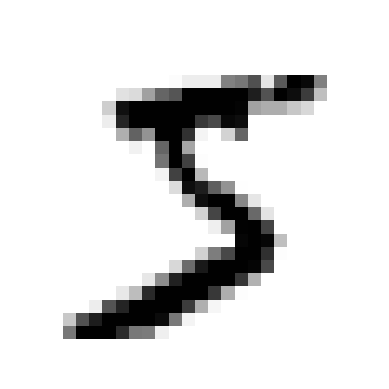

Label = 5


In [3]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    plt.show()

some_digit = X[0]
plot_digit(some_digit)
print(f"Label = {y[0]}")

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
y_train_5 = (y_train == "5") # True for all 5s, False for all other digits
y_test_5 = (y_test == "5")

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

array([ True])

In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score(estimator=sgd_clf, X=X_train, y=y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [7]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train))) # Prints False: no 5s detected

False


In [8]:
cross_val_score(estimator=dummy_clf, X=X_train, y=y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [9]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(estimator=sgd_clf, X=X_train, y=y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f"precision_score = {precision_score(y_train_5, y_train_pred)}")
print(f"recall_score = {recall_score(y_train_5, y_train_pred)}")
print(f"f1_score = {f1_score(y_train_5, y_train_pred)}")

precision_score = 0.8370879772350012
recall_score = 0.6511713705958311
f1_score = 0.7325171197343846


In [11]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [13]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [14]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [15]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

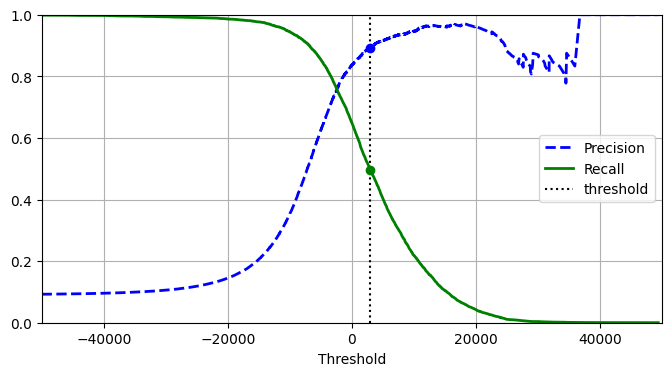

In [17]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

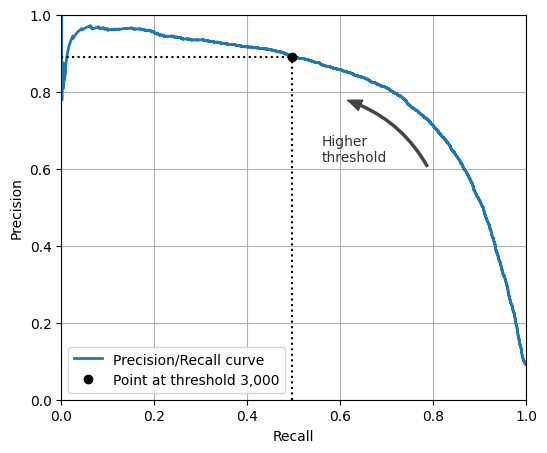

In [19]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [22]:
idx_for_precision_90 = (precisions >= 0.9).argmax()
threshold_for_90_precision = thresholds[idx_for_precision_90]
threshold_for_90_precision

3370.0194991439594

In [25]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
print(f"precision_score = {precision_score(y_train_5, y_train_pred_90)}")
print(f"recall_score = {recall_score(y_train_5, y_train_pred_90)}")

precision_score = 0.9000345901072293
recall_score = 0.4799852425751706


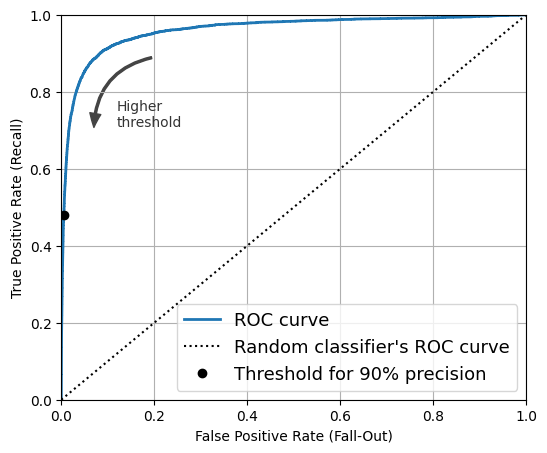

In [27]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

In [28]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [29]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

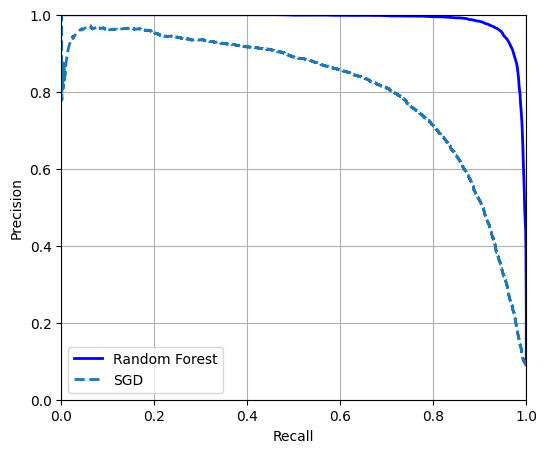

In [31]:
y_scores_forest = y_probas_forest[:, 1]  # score = proba of positive class
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [33]:
y_train_pred_forest = y_probas_forest[:, 1] > 0.5  # positive proba >= 0.5

print(f"F1 Score = {f1_score(y_train_5, y_train_pred_forest)}")
print(f"ROC AUC Score = {roc_auc_score(y_train_5, y_scores_forest)}")
print(f"Precision Score = {precision_score(y_train_5, y_train_pred_forest)}")
print(f"Recall Score = {recall_score(y_train_5, y_train_pred_forest)}")

F1 Score = 0.9242275142688446
ROC AUC Score = 0.9983436731328145
Precision Score = 0.9905083315756169
Recall Score = 0.8662608374838591


In [34]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])  # y_train, not y_train_5
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [35]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [36]:
class_id = some_digit_scores.argmax()
class_id

5

In [37]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [38]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [39]:
len(ovr_clf.estimators_)

10

In [40]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [41]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [42]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

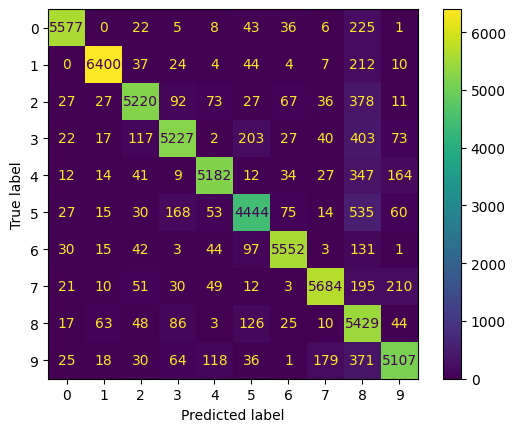

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

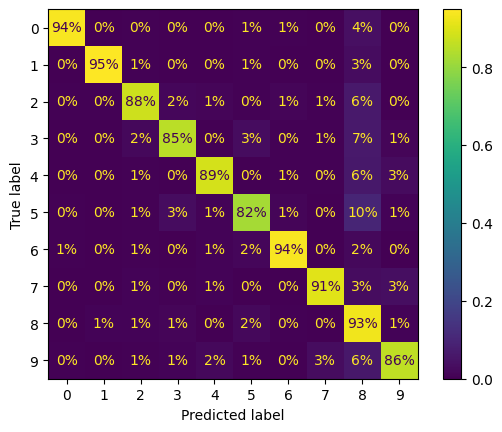

In [46]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.show()

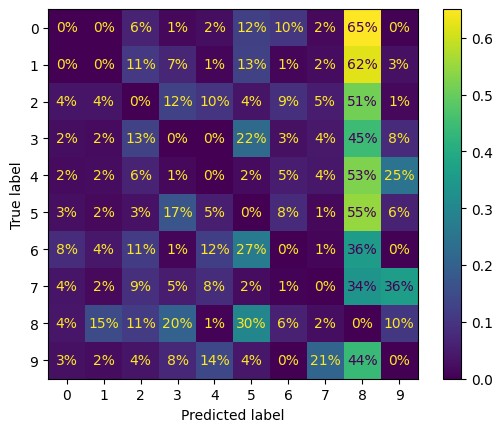

In [47]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.show()

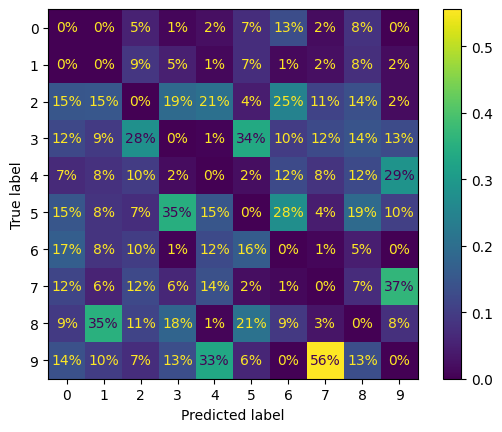

In [48]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="pred", values_format=".0%")
plt.show()

<a id='Chapter-3-ex'></a>
### Exercises

<a id='Chapter-4'></a>
## Chapter 4

---

<a id='Chapter-4-rn'></a>
### Reading Notes:

**Question 1:** 

**Answer:** 

**Question 2:** 

**Answer:** 

<a id='Chapter-4-ex'></a>
### Exercises

<a id='Chapter-5'></a>
## Chapter 5

---

<a id='Chapter-6'></a>
## Chapter 6

---

<a id='Chapter-7'></a>
## Chapter 7

---

<a id='Chapter-8'></a>
## Chapter 8

---

<a id='Chapter-9'></a>
## Chapter 9

---

<a id='Chapter-10'></a>
## Chapter 10

---

<a id='Chapter-11'></a>
## Chapter 11

---

<a id='Chapter-12'></a>
## Chapter 12

---